In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Highlighting the maixmum values of each attribute in the data set

In [3]:
df=pd.read_csv('2019.csv')
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

In [4]:
df.shape

(156, 9)

<AxesSubplot:>

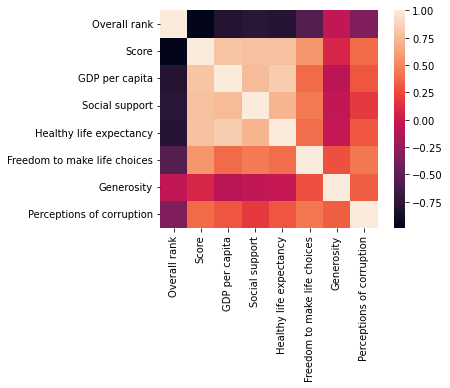

In [5]:
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

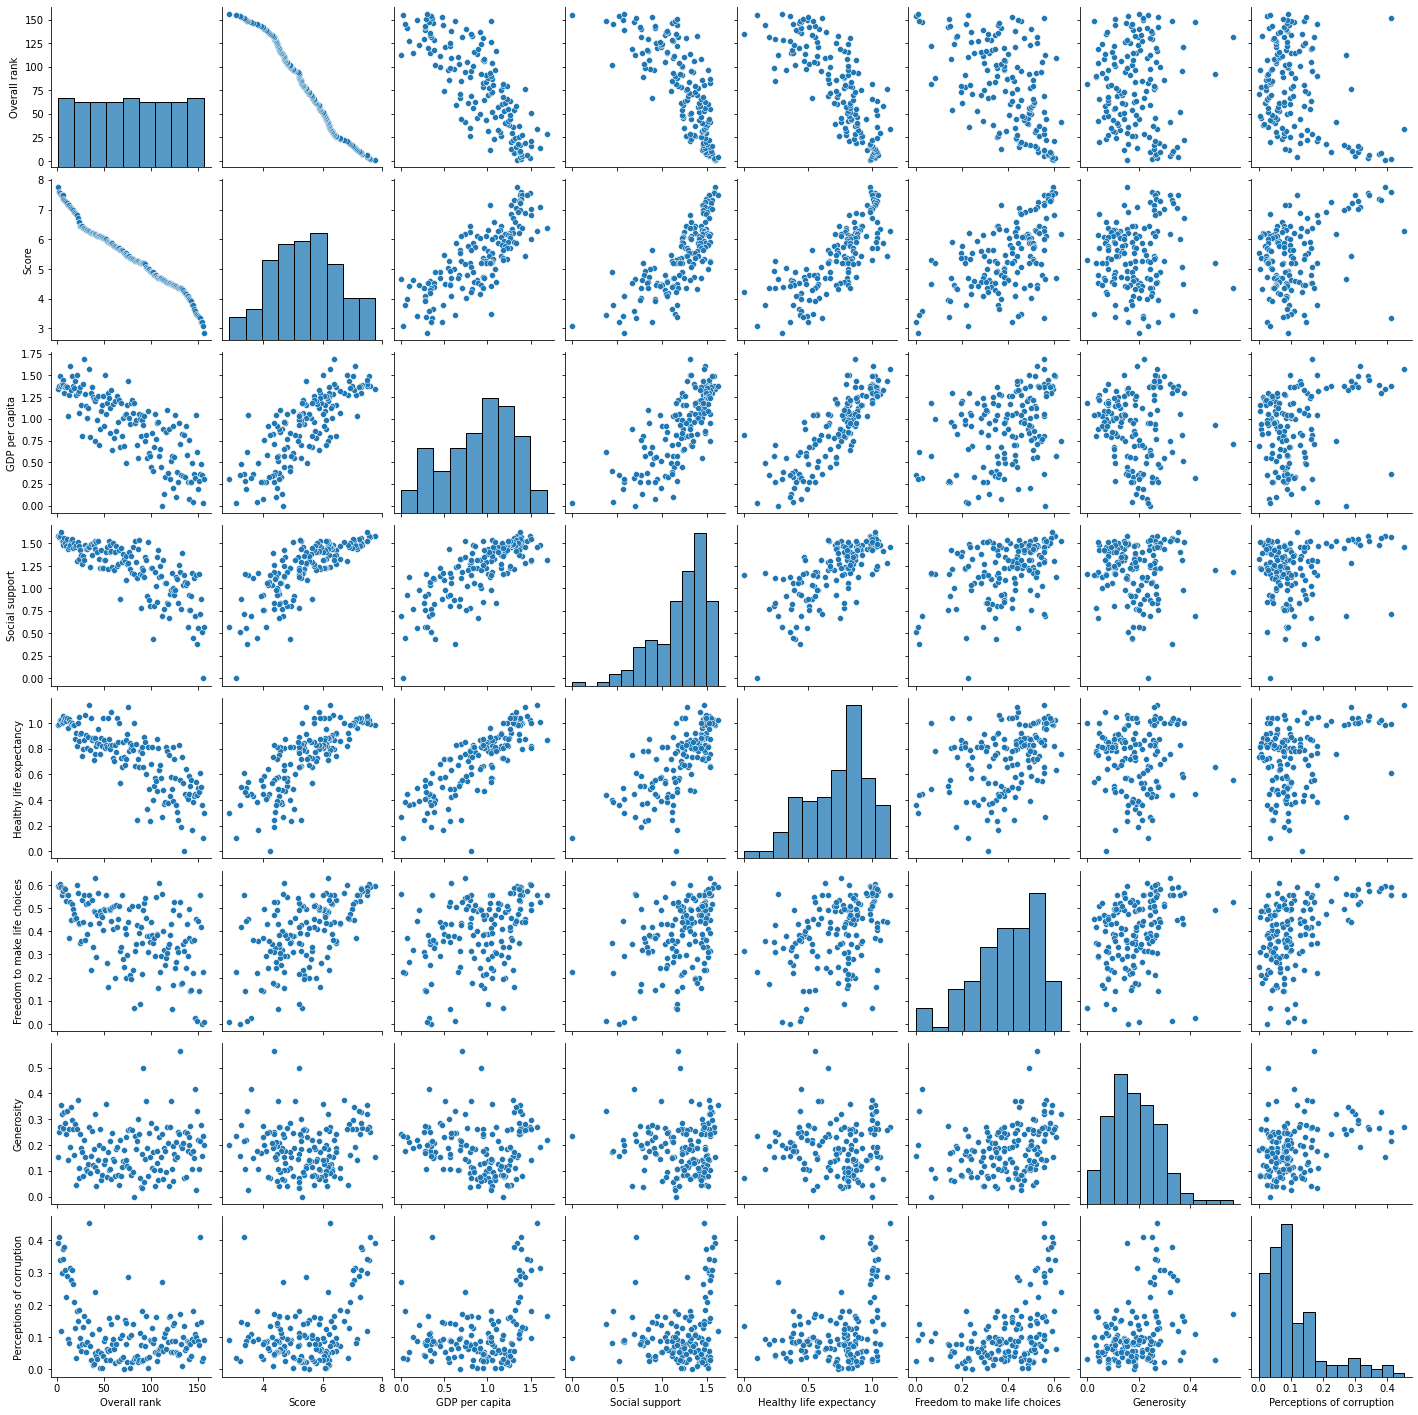

In [6]:
sns.pairplot(df)

Top 10 countries for each attribute.

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

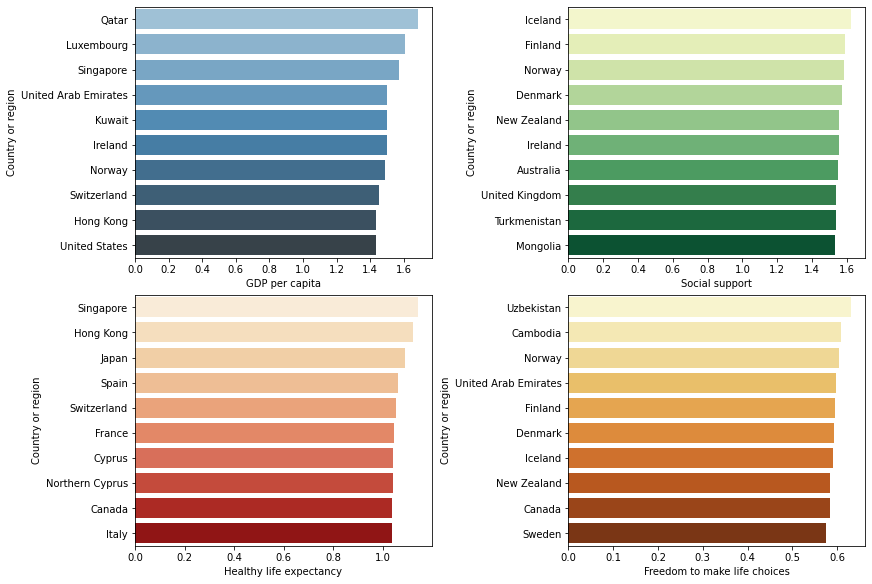

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country or region'>

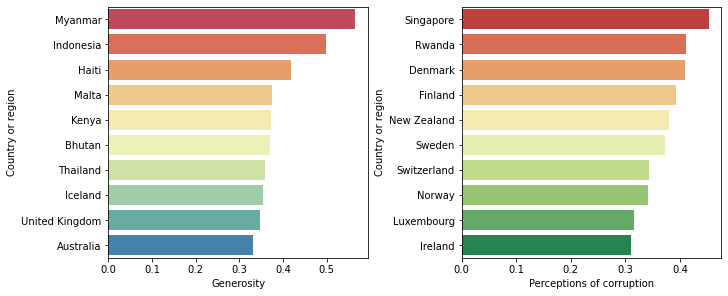

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')


Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [9]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [10]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [13]:
#Finally adding a new column Category to the dataset and distributing the levels High,Low,Mid.

cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat 

In [14]:
color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)

Now since I am from India I would like to see my countries position on the list and also checkout some other countries where people from India usually settle for economic benifits!So lets check them out

In [15]:
df.loc[df['Country or region']=='India']

Overall rank Country or region  Score  GDP per capita  Social support  \
139           140             India  4.015           0.755           0.765   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
139                    0.588                         0.498         0.2   

     Perceptions of corruption Category  
139                      0.085      Low

 India is pretty loww on the list, i thought it would make the Mid category but sadly it belongs to the low Category!Now we shall check out Canada,UK and USA

In [16]:
df.loc[df['Country or region']=='United States']

Overall rank Country or region  Score  GDP per capita  Social support  \
18            19     United States  6.892           1.433           1.457   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
18                    0.874                         0.454        0.28   

    Perceptions of corruption Category  
18                      0.128     High

In [17]:
df.loc[df['Country or region']=='United Kingdom']

Overall rank Country or region  Score  GDP per capita  Social support  \
14            15    United Kingdom  7.054           1.333           1.538   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
14                    0.996                          0.45       0.348   

    Perceptions of corruption Category  
14                      0.278     High

In [18]:
df.loc[df['Country or region']=='Canada']

Overall rank Country or region  Score  GDP per capita  Social support  \
8             9            Canada  7.278           1.365           1.505   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
8                    1.039                         0.584       0.285   

   Perceptions of corruption Category  
8                      0.308     High

So all of them belong to the HIGH category and apparently Canada is pretty high upand has a great happiness score.No wonder people are flocking to these countries

Lets have a head to head comparison for the above mentioned four countries to understand why they have such a good or a band rank worldwide and get some insight

In [20]:
d= df[(df['Country or region'].isin(['India','Canada','United Kingdom', 'United States']))]
d

Overall rank Country or region  Score  GDP per capita  Social support  \
8               9            Canada  7.278           1.365           1.505   
14             15    United Kingdom  7.054           1.333           1.538   
18             19     United States  6.892           1.433           1.457   
139           140             India  4.015           0.755           0.765   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
8                      1.039                         0.584       0.285   
14                     0.996                         0.450       0.348   
18                     0.874                         0.454       0.280   
139                    0.588                         0.498       0.200   

     Perceptions of corruption Category  
8                        0.308     High  
14                       0.278     High  
18                       0.128     High  
139                      0.085      Low

Social Support vs GDP per capita vs Healthy life expectancy

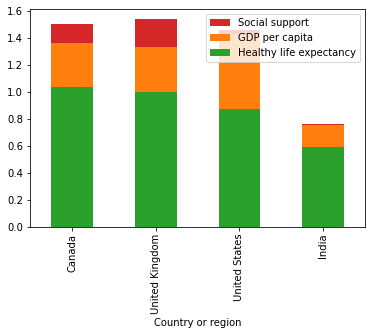

In [21]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

Freedom to make life choices vs Generosity vs Corruption

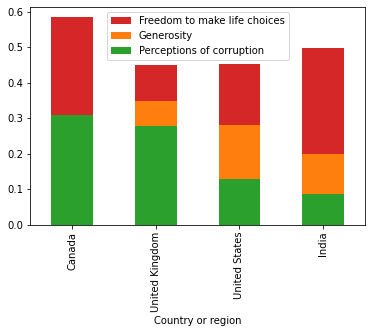

In [22]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()

Geographic Visualization of Happiness Score

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Checking out previous happiness reports to see changes in attribute distribution

In [24]:
df15=pd.read_csv('2015.csv')
df16=pd.read_csv('2016.csv')
df17=pd.read_csv('2017.csv')
df18=pd.read_csv('2018.csv')

In [25]:
df15.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201

In [26]:
df16.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [27]:
df17.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [28]:
df18.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

Lets consider Economy(monetary),Social Support(family) and Health as primary concerns for an individual residing in a country i.e overall wellbeing.Lets see how these distributions are altering over the years or are staying stagnant.

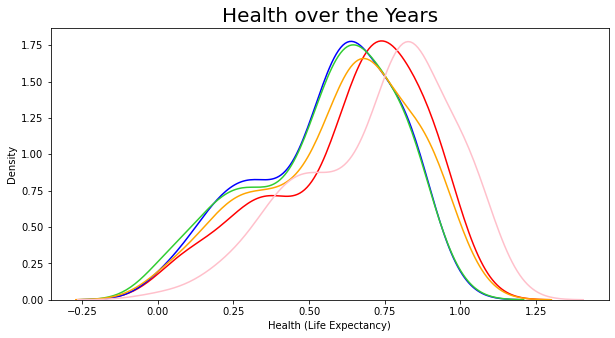

In [29]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Health (Life Expectancy)'],color='red')
sns.kdeplot(df16['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df17['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(df18['Healthy life expectancy'],color='orange')
sns.kdeplot(df['Healthy life expectancy'],color='pink')
plt.title('Health over the Years',size=20)
plt.show()

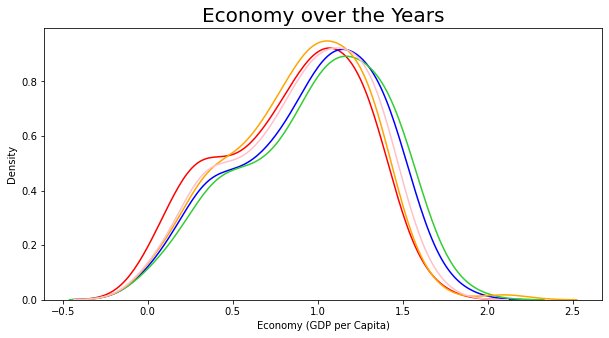

In [30]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Economy (GDP per Capita)'],color='red')
sns.kdeplot(df16['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(df17['Economy..GDP.per.Capita.'],color='limegreen')
sns.kdeplot(df18['GDP per capita'],color='orange')
sns.kdeplot(df['GDP per capita'],color='pink')
plt.title('Economy over the Years',size=20)
plt.show()

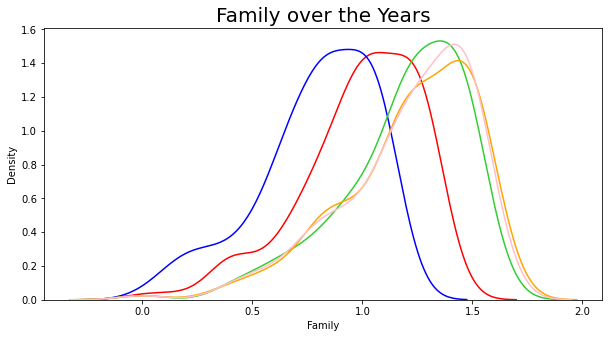

In [31]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Family'],color='red')
sns.kdeplot(df16['Family'],color='blue')
sns.kdeplot(df17['Family'],color='limegreen')
sns.kdeplot(df18['Social support'],color='orange')
sns.kdeplot(df['Social support'],color='pink')
plt.title('Family over the Years',size=20)
plt.show()

Next in line is the relationship between Freedom and Corruption prevalent in the government. Corruption is an enormous obstacle to the realization of all human rights – civil, political, economic, social and cultural, as well as the right to development. Corruption violates the core human rights principles of transparency, accountability, non-discrimination and meaningful participation in every aspect of the life of the communit

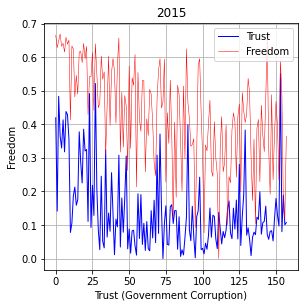

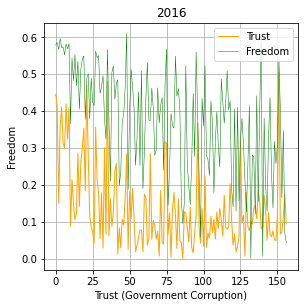

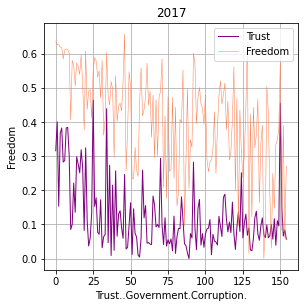

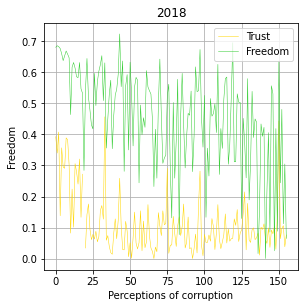

In [33]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
df15["Trust (Government Corruption)"].plot(kind='line', color='blue',label='Trust',linewidth=1,grid=True,linestyle="-")
df15["Freedom"].plot(kind="line", color="red", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.title('2015')
plt.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 2)
df16["Trust (Government Corruption)"].plot(kind='line', color='orange',label='Trust',linewidth=1,grid=True,linestyle="-")
df16["Freedom"].plot(kind="line", color="green", label="Freedom", linewidth=0.5,grid=True,linestyle="-") 
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.title('2016')
plt.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 3)
df17["Trust..Government.Corruption."].plot(kind='line', color='purple',label='Trust',linewidth=1,grid=True,linestyle="-")
df17["Freedom"].plot(kind="line", color="coral", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Trust..Government.Corruption.')
plt.ylabel('Freedom')
plt.title('2017')
plt.legend(loc='upper right')
plt.show()

fig = plt.figure(figsize=(10,10))
plt.subplot(2, 2, 4)
df18["Perceptions of corruption"].plot(kind='line', color='gold',label='Trust',linewidth=0.5,grid=True,linestyle="-")
df18["Freedom to make life choices"].plot(kind="line", color="limegreen", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Perceptions of corruption')
plt.ylabel('Freedom')
plt.title('2018')
plt.legend(loc='upper right')
plt.show()


Adding new attribute Year

In [34]:
df18['Year']='2018'
df['Year']='2019'
df15['Year']='2015'
df16['Year']='2016'
df17['Year']='2017'

Appending multiple dataframes for extracting more information.Thus we will be selecting some attributes from ecery dataset and also changing their column names and making them similar to ease out the appending part

In [35]:
df.rename(columns={'Country or region':'Country'},inplace=True)
data1=df.filter(['Country','GDP per capita','Year'],axis=1)

df15.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data2=df15.filter(['Country','GDP per capita',"Year"],axis=1)

df16.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data3=df16.filter(['Country','GDP per capita',"Year"],axis=1)

df17.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita'},inplace=True)
data4=df17.filter(['Country','GDP per capita','Year'],axis=1)

df18.rename(columns={'Country or region':'Country'},inplace=True)
data5=df18.filter(['Country','GDP per capita',"Year"],axis=1)

data2=data2.append([data3,data4,data5,data1])

We have a new dataframe with info of 2015-2019 GDP per capita of every country

<AxesSubplot:xlabel='Year', ylabel='Country'>

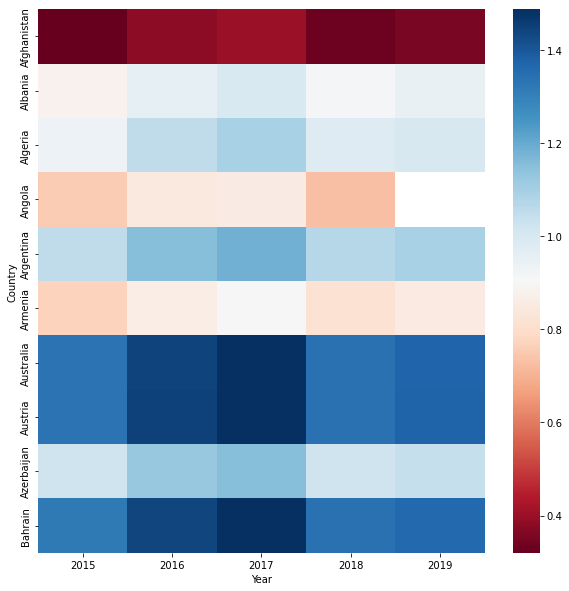

In [37]:
plt.figure(figsize=(10, 10))
h=pd.pivot_table(data2,values='GDP per capita',
index=['Country'],
columns='Year')
h=h.head(10)
sns.heatmap(h,cmap="RdBu")

# 
HIERARCHICAL CLUSTERING(with 2019)

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.src

There are multiple Attributes or practices in this case on which the happiness score depends on – GDP,Family,Health,Corruption etc. Our aim is to make clusters from this data that can segment similar countries together. We will use Hierarchical Clustering for this problem.

In [38]:
original=original.drop(['Country or region','Overall rank'],axis=1)

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude

In [39]:
from sklearn.preprocessing import normalize
data_scaled = normalize(original)
data_scaled = pd.DataFrame(data_scaled, columns=original.columns)
datasc=data_scaled.copy()
data_scaled.head()

Score  GDP per capita  Social support  Healthy life expectancy  \
0  0.955020        0.164722        0.195085                 0.121206   
1  0.952077        0.173253        0.197055                 0.124772   
2  0.948783        0.186893        0.198699                 0.129117   
3  0.949879        0.174918        0.205845                 0.130048   
4  0.952236        0.177527        0.193550                 0.127041   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      0.073264    0.018808                   0.048310  
1                      0.074162    0.031569                   0.051362  
2                      0.075737    0.034038                   0.042830  
3                      0.074910    0.044870                   0.014957  
4                      0.070833    0.040948                   0.037896

Let’s draw the dendrogram(A dendrogram is a tree-like diagram that records the sequences of merges or splits)to help us decide the number of clusters for the problem

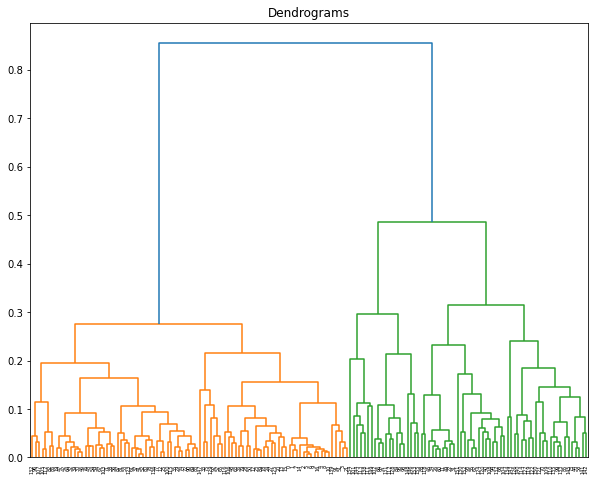

In [41]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples.

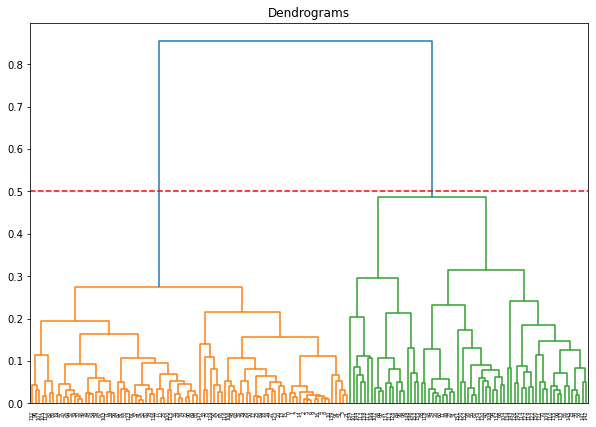

In [42]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters

In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

0-belongs to cluster number 1
1-belongs to cluster number 2

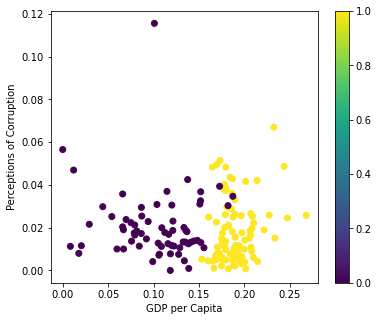

In [45]:
plt.figure(figsize=(6, 5))  
plt.scatter(data_scaled['GDP per capita'], data_scaled['Perceptions of corruption'], c=cluster.labels_) 
plt.xlabel('GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.colorbar()

So here we can clearly see two well defined clusters

# K MEANS CLUSTERING

k-means is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed apriori. The main idea is to define k centers, one for each cluster

Let’s pick these two variables and visualize the data points

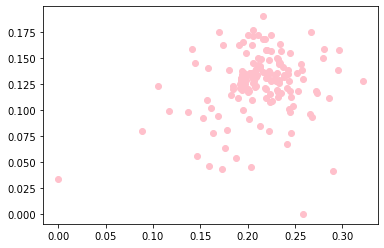

In [47]:
X = datasc[["Social support","Healthy life expectancy"]]
plt.scatter(X["Social support"],X["Healthy life expectancy"],c='pink')
plt.show()

Now on performing K MEANS CLUSTERING with 3 clusters

[[0.25122217 0.11686624]
 [0.1455177  0.07640553]
 [0.2054251  0.13849264]]


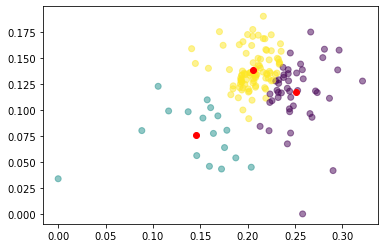

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Social support'], X['Healthy life expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

So here we can clearly see three well defined clusters with their centroids

[[0.20198175 0.13780805]
 [0.14187728 0.07837246]
 [0.23922433 0.05660473]
 [0.24759331 0.12975844]]


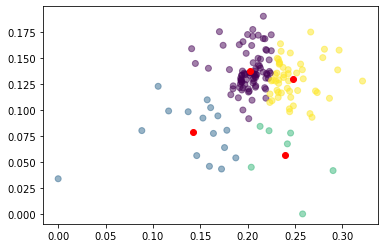

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Social support'], X['Healthy life expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

In [58]:
wcss=[]
for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(X)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [59]:
wcss

[0.3810421680469731,
 0.2467446199379029,
 0.17241823697529027,
 0.14276488607070661,
 0.12055257390406601,
 0.09919928863519334,
 0.07979073348097682,
 0.06504657568403875,
 0.05511080543460736,
 0.05031274773569941,
 0.043855465986126795,
 0.03912968885560504,
 0.03483818822582466,
 0.032635247422691485,
 0.02969515741337628,
 0.026645882911512153,
 0.024865416048813625,
 0.023116529010260834,
 0.021506314538952617,
 0.02063447806958906,
 0.018354527166025647,
 0.017408242080653127,
 0.016116316208119354,
 0.015276958070320208,
 0.014444560704586502,
 0.01303482507597412,
 0.012784329643669311,
 0.011605870000307118,
 0.011291652202667831]

Text(0, 0.5, 'Wcss')

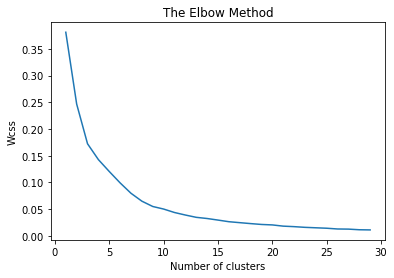

In [60]:
number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')